## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

## Importing the Dataset

In [2]:
data_path = "Mall_Customers.csv"
df = pd.read_csv(data_path)

## Analyzing the Data

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Few Changes

In [10]:
df.rename(columns={'Genre':'Gender',
                          'Annual Income (k$)':'Annual_Income',
                          'Spending Score (1-100)':'Spending_Score'}, 
                 inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = df.iloc[:, [3, 4]].values

### Graphs 

## Clustering

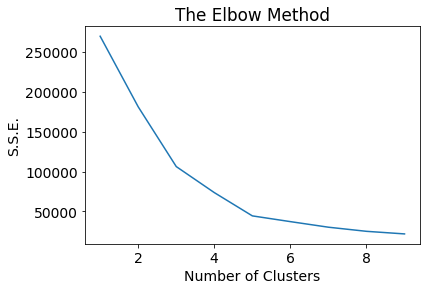

In [14]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 23)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)

plt.plot(K, distortions)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("S.S.E.")
plt.show()

In [22]:
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 23)
Y = kmeansModel.fit_predict(X)

## Visualizing Clusters

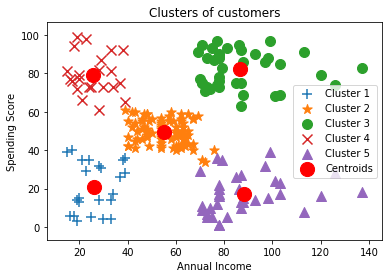

In [23]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, marker = '+', label = "Cluster 1" )
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, marker = '*', label = "Cluster 2" )
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, marker = 'o', label = "Cluster 3" )
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, marker = 'x', label = "Cluster 4" )
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 100, marker = '^', label = "Cluster 5" )
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s = 200, c = "red", label = "Centroids")

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()